<a href="https://colab.research.google.com/github/scdesiraju/Recommendation-System/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Data Visualization:**

In [3]:
fav = pd.read_csv('Favorite Movies.csv')

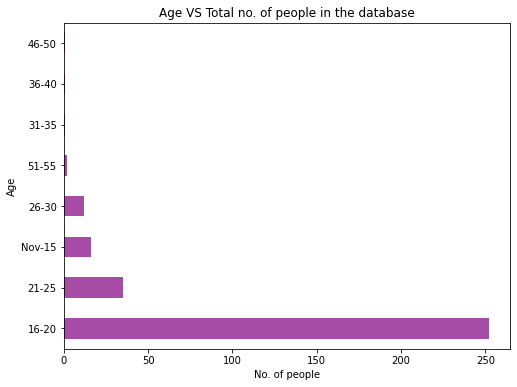

In [4]:
ser=fav['age'].value_counts()
plt.rcParams['figure.figsize']=8,6
ser.plot(kind='barh',color='purple',alpha=0.7)
plt.xlabel('No. of people')
plt.ylabel('Age')
plt.title('Age VS Total no. of people in the database')
plt.show()

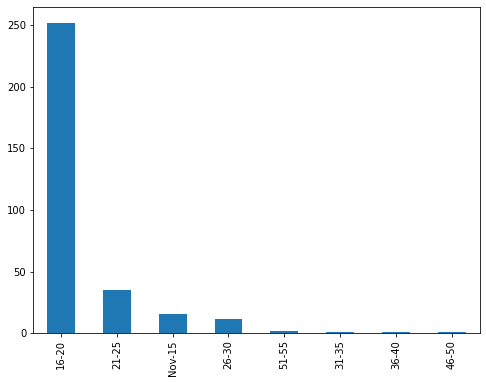

In [5]:
fav.age.value_counts().plot(kind='bar')

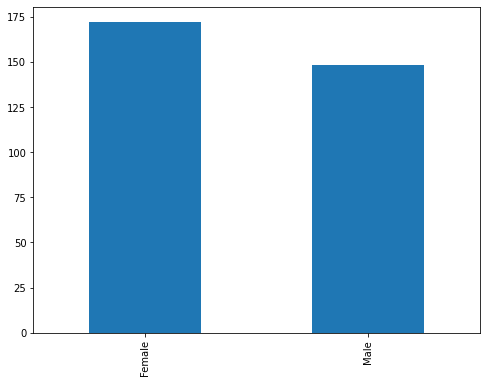

In [6]:
fav.gender.value_counts().plot(kind='bar')

In [7]:
movieDS = pd.read_csv("movie_dataset.csv", engine="python", sep=',', quotechar='"', error_bad_lines=False)

Skipping line 802: unexpected end of data


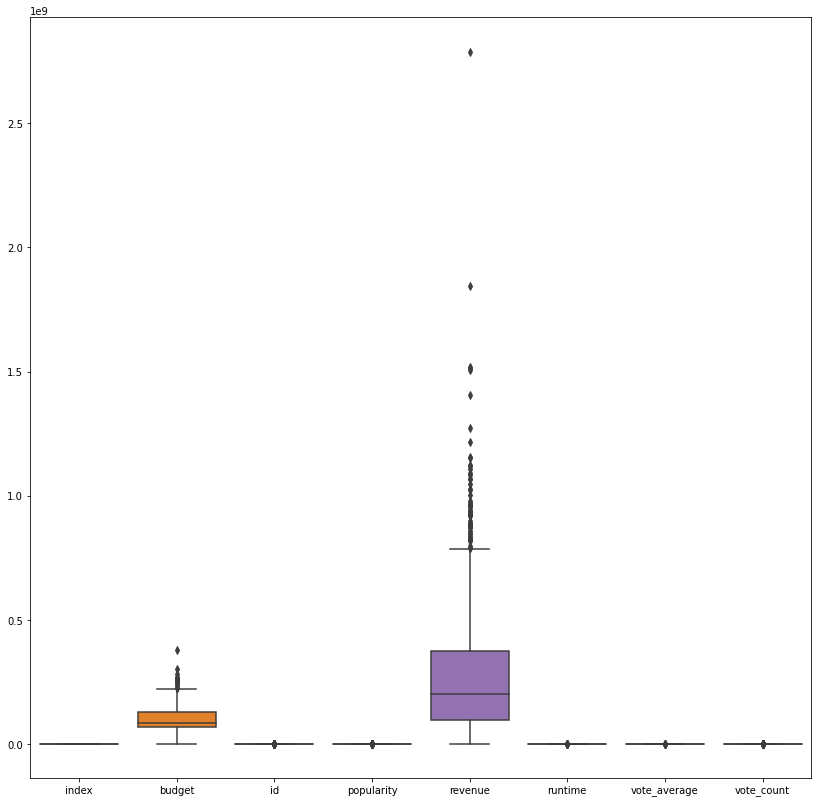

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize']=14,14
sns.boxplot(data=movieDS)

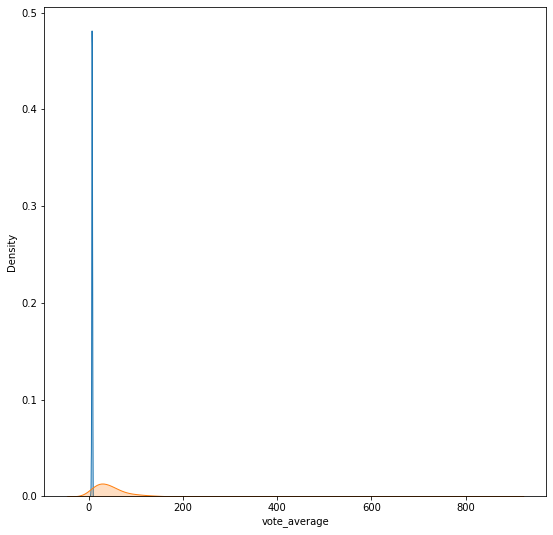

In [9]:
plt.rcParams['figure.figsize']=9,9
sns.kdeplot(movieDS['vote_average'],shade=True)
sns.kdeplot(movieDS['popularity'],shade=True)

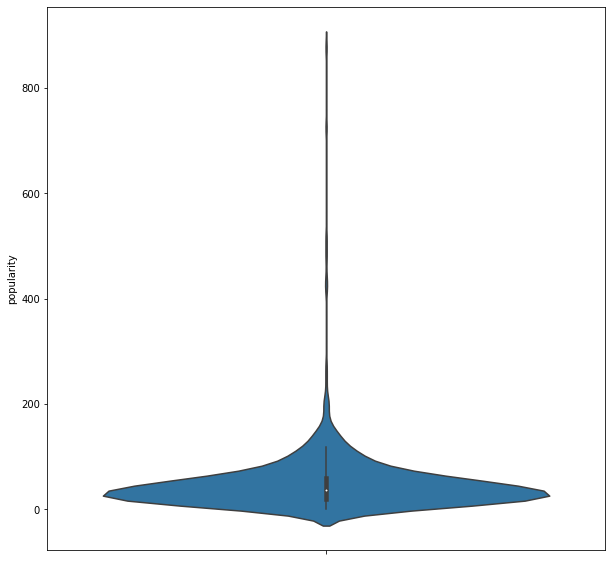

In [10]:
plt.rcParams['figure.figsize']=10,10
sns.violinplot(y='popularity',data=movieDS)

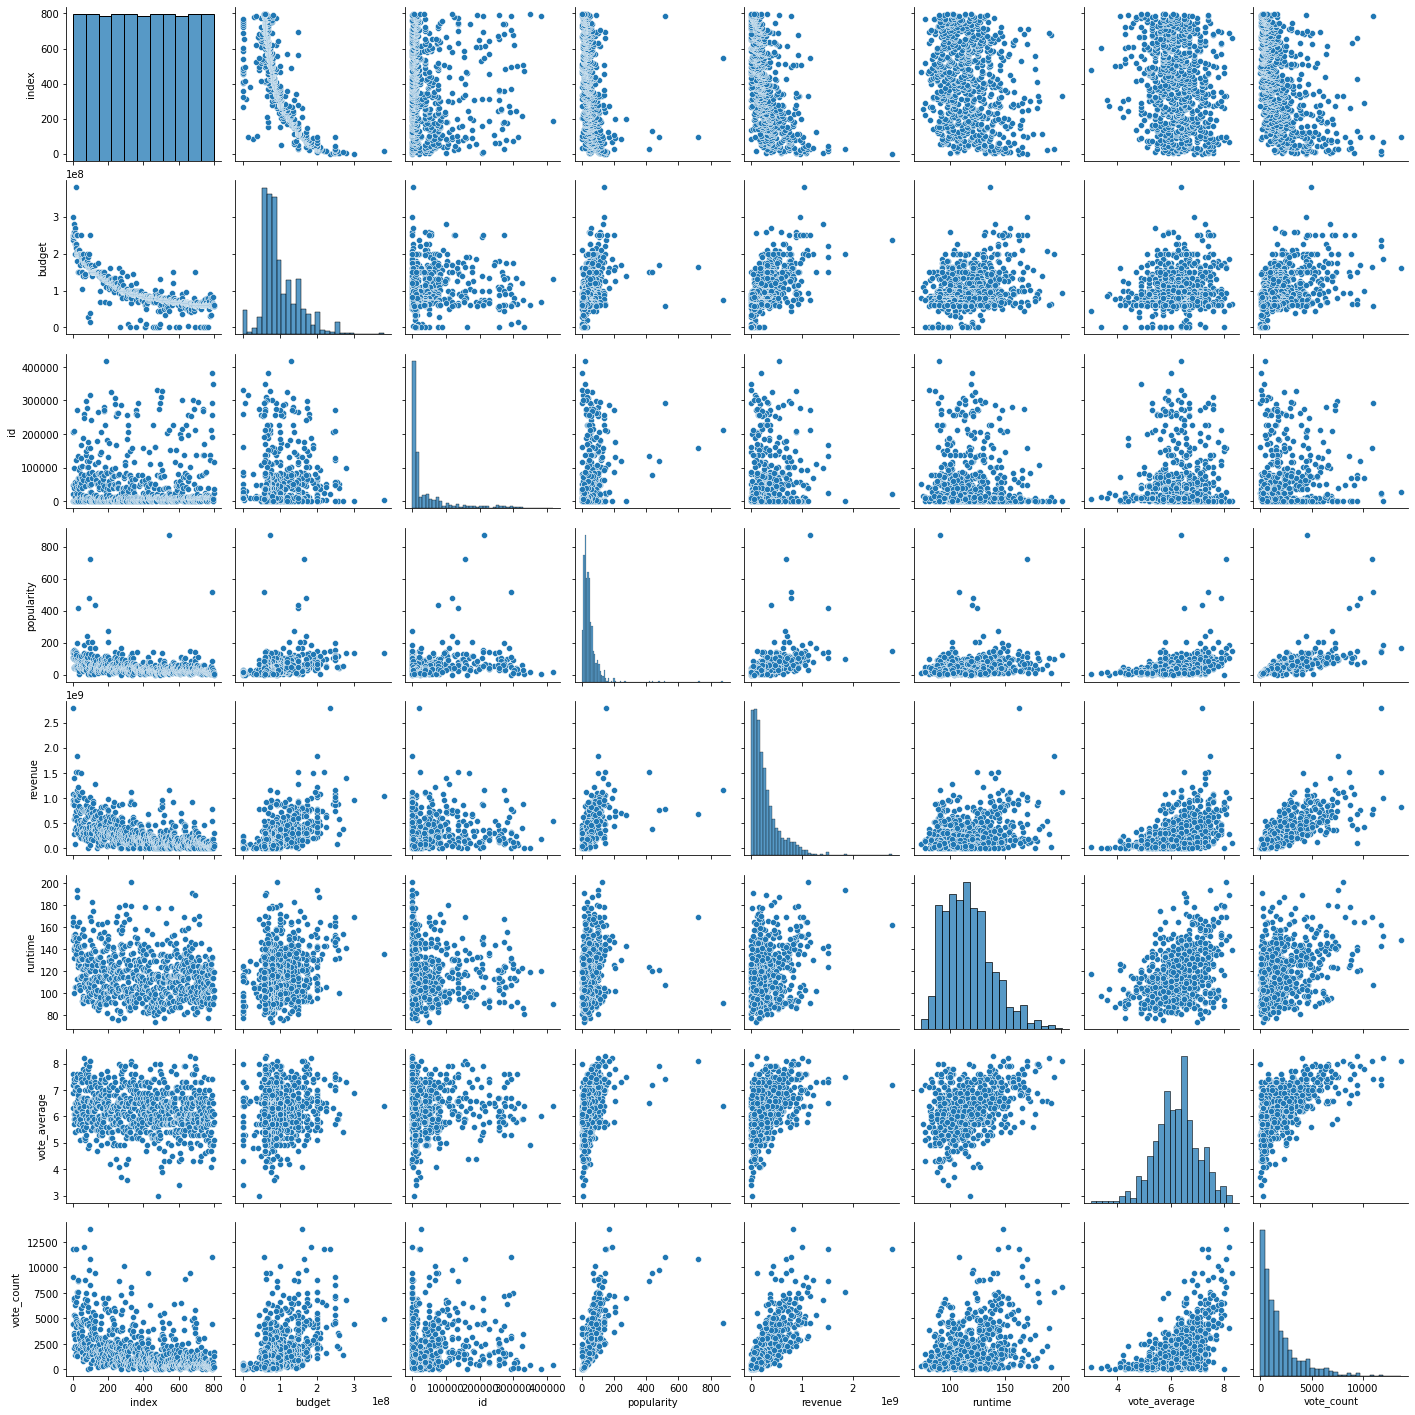

In [11]:
sns.pairplot(movieDS)

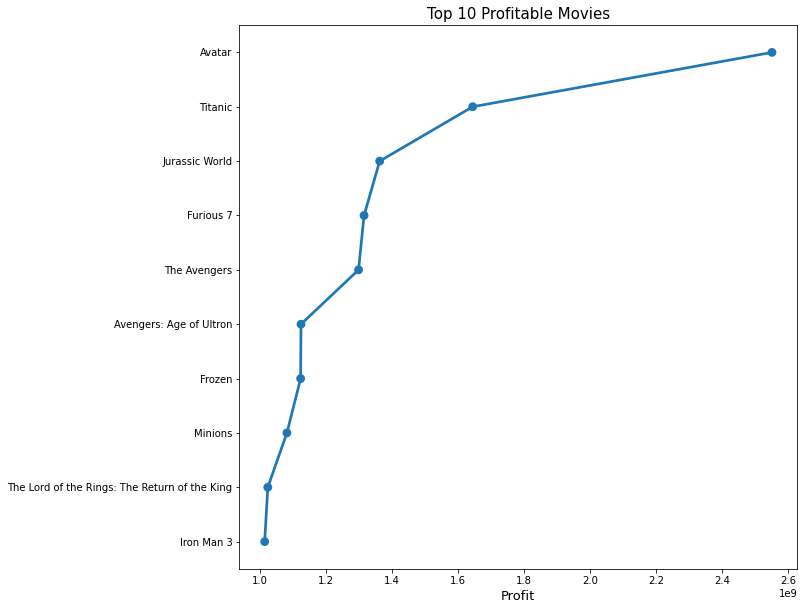

In [12]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
movieDS['Profit'] = movieDS['revenue'] - movieDS['budget']
info = pd.DataFrame(movieDS['Profit'].sort_values(ascending = False))
info['original_title'] = movieDS['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

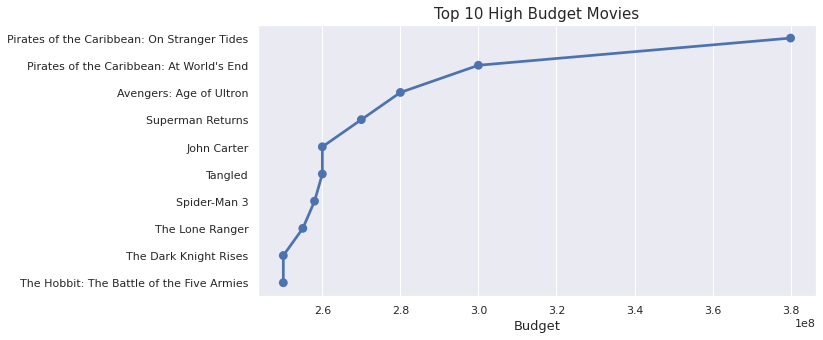

In [13]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movieDS['budget'].sort_values(ascending = False))
info['original_title'] = movieDS['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

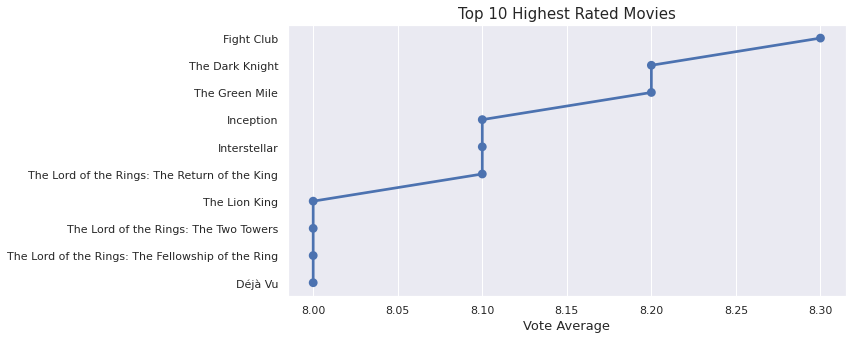

In [14]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movieDS['vote_average'].sort_values(ascending = False))
info['original_title'] = movieDS['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

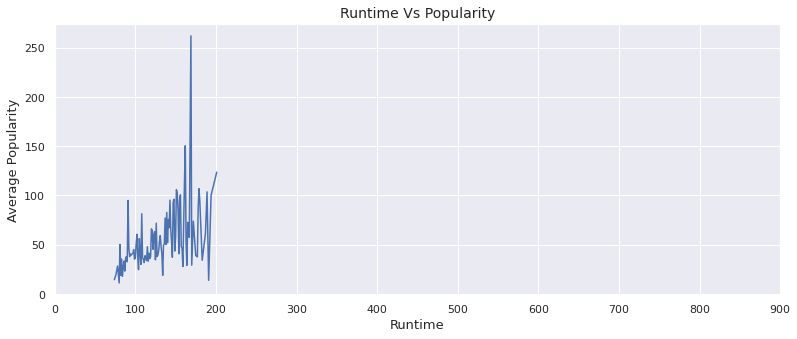

In [15]:
#use groupby function and group the data according to their runtime.
#make a plot using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
movieDS.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

## **Recommendation on basis of Data Analysis:**

In [16]:
import pandas as pd
mv = pd.read_csv("Favorite Movies.csv")

print("Hello! Before we recommend movies we think you will love, we have a few questions to ask you.")

Age = 23 #@param {type:"integer"}

gender = 'Male' #@param ["Female", "Male"]

genre = 'English Romantic Comedy Movies' #@param ["English Sci-Fi movies", "English Thriller Movies","English Romantic Comedy Movies","English Action Movies","English Horror Movies","English Animated Movies"]

#Grouping age group wise
if Age>15 and Age<21:
  age_group='16-20'
elif Age>20 and Age<26:
  age_group='21-25'
elif Age>25 and Age<31:
  age_group='26-30'
elif Age>30 and Age<36:
  age_group='31-35'
elif Age>35 and Age<41:
  age_group='35-40'
elif Age>40 and Age<46:
  age_group='41-45'
elif Age>45 and Age<51:
  age_group='46-50'
elif Age>50 and Age<56:
  age_group='51-55'

mv11 = mv.loc[mv["age"]==age_group]

mv11 = mv.loc[mv["gender"]==gender]

mv11 = mv11.loc[:,mv11.columns.isin([genre,'Timestamp'])]

mv13 = mv11.groupby(genre).nunique()

mv13 = pd.DataFrame(mv13)

mv13['per'] = mv13["Timestamp"]/(mv13["Timestamp"].sum())*100

mv13 = mv13.sort_values(by = 'per',ascending = False)

print("**********The movies recommendated are as follows**********")
print(mv13[0:5])

Hello! Before we recommend movies we think you will love, we have a few questions to ask you.
**********The movies recommendated are as follows**********
                                 Timestamp        per
English Romantic Comedy Movies                       
Titanic                                 62  41.891892
The Notebook                            24  16.216216
The Perks of Being a Wallflower         14   9.459459
500 Days of Summer                      12   8.108108
When Harry Met Sally                     6   4.054054


## **Movie : Content - Based Recommendation:**

In [17]:
##Step 1: Read CSV File
df = pd.read_csv("movie_dataset.csv", engine="python", sep=',', quotechar='"', error_bad_lines=False,warn_bad_lines=False)


##Step 2: Select Features
#If you visualize the dataset, you will see that it has many extra info about a movie. 
#We don’t need all of them. So, we choose keywords, cast, genres and director column to use as our feature set(the so called “content” of the movie).
features = ["keywords","cast","director","genres"]


##Step 3: Create a column in DF which combines all selected features
#Our next task is to create a function for combining the values of these columns into a single string.
#Now, we need to call this function over each row of our dataframe. 
#But, before doing that, we need to clean and preprocess the data for our use. We will fill all the NaN values with blank string in the dataframe.
for feature in features:
  df[feature]=df[feature].fillna("")
 

def combine(row):
  return row["keywords"] +" "+ row["cast"]+" " + row["director"] + " " + row["genres"]

df["combined_features"]=df.apply(combine,axis=1)

#Now that we have obtained the combined strings, we can now feed these strings to a CountVectorizer() object for getting the count matrix.

##Step 4: Create count matrix from this new combined column
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
#count_matrix gives us a sparse matrix. To make it in human readable form, we need to apply toarrray() method over it. And before printing out this count_matrix,
#let us first print out the feature list(or, word list), which have been fed to our CountVectorizer() object.

##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_model = cosine_similarity(count_matrix)

cosine_model_df = pd.DataFrame(cosine_model, index= df.title, columns=df.title)

def make_recom(movie_user_likes):
  return cosine_model_df[movie_user_likes].sort_values(ascending=False)[1:6] # We are considering it from 1 as the first element is always itself.



cols = pd.DataFrame(df["original_title"])

title_list=cols["original_title"].tolist()

mov=input("Enter your favorite movie: ")


#Check if the entered movie is present in the movies list(title_list)
movies = list(filter(lambda x: mov in x, title_list)) 
movie = str(movies[0])

#Send movie to make recommendation function
print("\n **********The movies recommendated are as follows**********")
make_recom(movie)

Enter your favorite movie: Avatar

 **********The movies recommendated are as follows**********


title
Guardians of the Galaxy    0.423390
Star Trek Into Darkness    0.344265
Star Trek Beyond           0.335968
Planet of the Apes         0.281091
Galaxy Quest               0.280900
Name: Avatar, dtype: float64

## **Movie : Collaborative-Based Recommendations**

In [18]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)

userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)

corrMatrix = userRatings.corr(method='pearson') #Standard correlation 
corrMatrix.head(5)

cols=pd.DataFrame(corrMatrix.columns)

title_list=cols["title"].tolist() #title_list should have the list of titles present in the dataset after the cleaninf process
# if we take the titles from the movies dataset directly, then we'll get an error

a=[]
for i in range(0,3):
  mov=input("Enter movie {}: ".format(i+1))
  res = list(filter(lambda x: mov in x, title_list)) #Check if the entered movie is present in the movies list(title_list)
  a.append(res) #If it's there, then append it to a

mov = [] 
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) #to remove the nested lists
        else: 
            mov.append(i) # to append the movie tuple to the mov list
reemovNestings(a)
#print(mov)
print("\n \n")

rate=[]
for i in mov: # to rate the movie from the mov list and append it to rate list
  r=input("Rate the movie, {}: ".format(i)) 
  rate.append(r)
#print(rate)


def merge(mov, rate): # to merge the mov and rate lists where the 0 index of both the lists are grouped into one tuple of index 0  
    merged_list = tuple(zip(mov, rate))
    return merged_list 
    
m=merge(mov, rate)
movie=list(m)
print("\n \n")
print("*****The movies that are available after cleaning the data and your corresponding ratings are as follows*****")
print("\n")
print (movie)


print("\n \n")
print("**********The movies recommendated are as follows**********")
print("\n")

def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(int(rating)-2.5) # if the user gives a bad rating then by subtracting 2.5, which is the mean of the rating from 
    #1 to 5, all the movies with low rating would get -ve values whilst the rest get a positive value. If we dont do this then the recommendation will suggest movies according to any rating the user gives.
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

#movie=list(merged_list)
similar_movies = pd.DataFrame()
for movie,rating in movie:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(5)

Enter movie 1: Zodiac
Enter movie 2: 500
Enter movie 3: XxX

 

Rate the movie, Zodiac (2007): 3
Rate the movie, (500) Days of Summer (2009): 4

 

*****The movies that are available after cleaning the data and your corresponding ratings are as follows*****


[('Zodiac (2007)', '3'), ('(500) Days of Summer (2009)', '4')]

 

**********The movies recommendated are as follows**********




(500) Days of Summer (2009)       1.707293
Zodiac (2007)                     1.121878
Up in the Air (2009)              0.942433
Silver Linings Playbook (2012)    0.918841
Adventureland (2009)              0.898038
dtype: float64

## **Book Recommendation**

In [19]:
df = pd.read_csv("books.csv", engine="python", sep=',', quotechar='"', error_bad_lines=False,warn_bad_lines=False)

features = ["authors","language_code","publisher","average_rating"]

for feature in features:
  df[feature]=df[feature].fillna("")
 
def combine(row):
  return row["authors"] +" "+ row["language_code"]+" " + row["publisher"]+" "+str(row["average_rating"])

df["combined_features"]=df.apply(combine,axis=1)

cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])

cosine_model = cosine_similarity(count_matrix)

cosine_model_df = pd.DataFrame(cosine_model, index= df.title, columns=df.title)

def make_recom(book_user_likes):
  return cosine_model_df[book_user_likes].sort_values(ascending=False)[1:6]


cols = pd.DataFrame(cosine_model_df.columns)

title_list=cols["title"].tolist()

mov=input("Enter your favorite Book: ")
books = list(filter(lambda x: mov in x, title_list))

book = str(books[0])

print("\n **********The Books recommendated are as follows**********")
make_recom(book)

Enter your favorite Book: Notes from a Small Island

 **********The Books recommendated are as follows**********


title
The Lost Continent: Travels in Small Town America                                    0.857143
Neither Here nor There: Travels in Europe                                            0.857143
The Mother Tongue: English and How It Got That Way                                   0.857143
Made in America: An Informal History of the English Language in the United States    0.617213
African Nights                                                                       0.617213
Name: Notes from a Small Island, dtype: float64

## **TV Show Recommendation**

In [21]:
df = pd.read_csv("netflix_titles.csv.csv")

df = df.loc[df["type"] == "TV Show"]

features = ["director","cast","listed_in"]

for feature in features:
  df[feature]=df[feature].fillna("")
 
def combine(row):
  return row["director"] +" "+ row["cast"]+" " + row["listed_in"]

df["combined_features"]=df.apply(combine,axis=1)

cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
cosine_model = cosine_similarity(count_matrix)

cosine_model_df = pd.DataFrame(cosine_model, index= df.title, columns=df.title)

def make_recom(tvshow_user_likes):
  return cosine_model_df[tvshow_user_likes].sort_values(ascending=False)[1:6]


cols = pd.DataFrame(df["title"])

title_list=cols["title"].tolist()

mov=input("Enter your favorite TV Show: ")
tv_shows = list(filter(lambda x: mov in x, title_list))

tv_show = str(tv_shows[0])

print("\n **********The TV Shows recommendated are as follows**********")
make_recom(tv_show)

Enter your favorite TV Show: Friends

 **********The TV Shows recommendated are as follows**********


title
Motown Magic                                        1.0
Oscar's Oasis                                       1.0
Mother Goose Club                                   1.0
JingleKids                                          1.0
Loo Loo Kids: Johny & Friends Musical Adventures    1.0
Name: Loo Loo Kids: Johny & Friends Musical Adventures, dtype: float64